# Step 1: Load the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('student_feedback.csv')

In [3]:
# Reading the CSV Printing top 5 rows of the dataset
df.head()

Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                                    5                        4   
3                                    1                        5   
4                                    4                        6   

   Structuring of the course  \
0                          2   
1                          1   
2                          2   
3                          9   
4                          6   

   Provides support for students going above and beyond  \
0                                                  1      
1                                                  2      
2                                                  3      
3                                                  4      
4                                                  9      

   Course recommendation based on relevance  
0                                         8  
1                                         9  
2                                         1  
3                                         6  
4                                         9

# step 2: clean and Preprocess the Data

In [7]:
# Rename long column names for easier coding
df.rename(columns={
    'Well versed with the subject': 'Subject_Knowledge',
    'Explains concepts in an understandable way': 'Concept_Clarity',
    'Use of presentations': 'Presentations',
    'Degree of difficulty of assignments': 'Assignment_Difficulty',
    'Solves doubts willingly': 'Doubt_Support',
    'Structuring of the course': 'Course_Structure',
    'Provides support for students going above and beyond': 'Extra_Support',
    'Course recommendation based on relevance': 'Recommendation'
}, inplace=True)

In [8]:
# Checking for null values
df.isnull().sum()

Unnamed: 0               0
Student ID               0
Subject_Knowledge        0
Concept_Clarity          0
Presentations            0
Assignment_Difficulty    0
Doubt_Support            0
Course_Structure         0
Extra_Support            0
Recommendation           0
dtype: int64

Step 3: Quantitative Analysis (Rating Questions)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
rating_cols = ['Subject_Knowledge', 'Concept_Clarity', 'Presentations',
               'Assignment_Difficulty', 'Doubt_Support', 'Course_Structure', 'Extra_Support']

In [15]:
# Plot average rating for each category
avg_ratings = df[rating_cols].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')
plt.title("Average Ratings per Feedback Category")
plt.xlabel("Average Score (1–5)")
plt.grid(True)
plt.show()

/tmp/ipython-input-15-765123071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')


 Interpretation:
Highest rated categories = student satisfaction strengths

Lowest rated = potential areas for improvement

In [21]:
# Correlation analysis (Heatmap)

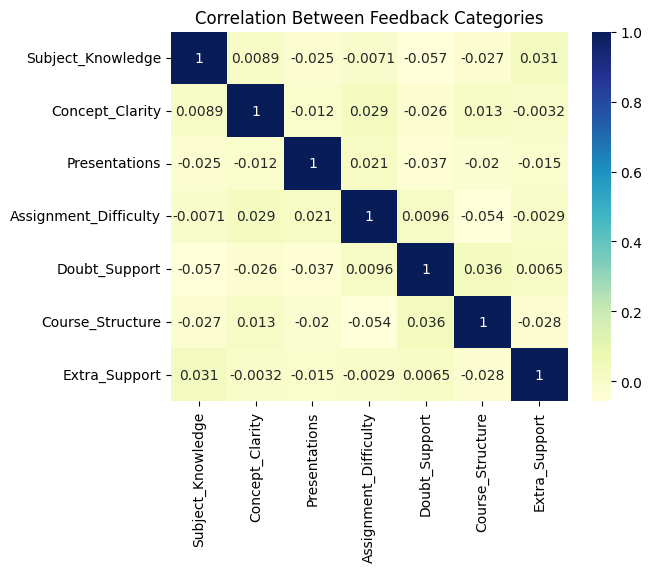

In [17]:
sns.heatmap(df[rating_cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Feedback Categories")
plt.show()


Interpretation

Does Extra Support correlate with Recommendation?

Are students who rate Concept Clarity also happy with Course Structure?

In [20]:
# Split by recommendation
recommend_group = df.groupby('Recommendation')[rating_cols].mean().T

# Plot comparison
recommend_group.plot(kind='barh', figsize=(10, 6), colormap='Set2')
plt.title("📈 Feedback Ratings: Recommended vs Not Recommended")
plt.xlabel("Average Rating")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
# Compare ratings based on Recommendation score (if it's binary: 1 = Yes, 0 = No)

In [23]:
# Generate Key Insights

✅ Strengths:

Students rate instructors highly on Subject Knowledge and Concept Clarity.

⚠️ Areas to Improve:

Assignment Difficulty received the lowest score — consider making tasks more manageable or better scaffolded.

Use of Presentations may be underutilized if rated low — suggest more visual/interactive content.

💡 Actionable Insight:

Students who rated Extra Support highly were much more likely to recommend the course — encourage teachers to provide extended help or mentorship.